In [2]:
import warnings
warnings.filterwarnings('ignore')

# Aula 2 - Fundamentos da aprendizagem supervisionada

____________

Conforme vimos anteriormente, dividimos ML em 3 grandes abordagens:

<img src="https://i.pinimg.com/originals/67/70/5d/67705d8c7aee0c6b601c16548076e924.png" width=600>

Neste curso, trataremos sobre a aprendizagem supervisionada e não supervisionada.

Inicialmente, vamos introduzir e explorar a fundo a **aprendizagem supervisionada**. 

Após seus conceitos e técnicas estarem bem fundamentados, veremos que a aprendizagem não-supervisionada será bem facilmente compreendida, o que faremos nos módulos seguintes.

Vamos apresentar a aprendizagem supervisionada segundo a seguinte figura:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/dfc2968c-b9a9-43a9-a531-e24e34c2e270.png>

Podemos resumir a informação acima no seguinte diagrama:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/70da0385-e3fc-4fda-ba15-0004cc3b68ae.PNG>

Esquematicamente, vamos dividir cada "passada no ciclo" de modelagem em dois grandes passos:

## Passo 1: construção do modelo

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/23769bcb-a364-4d7b-a68f-04b3dfcde684.png>

## Passo 2: avaliação do modelo

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/8de84cf0-adb1-4203-921c-bc8dec07df55.png>

Agora que temos estas noções claras, vamos concretizar, nas próximas aulas, as etapas do ciclo de modelagem (passos de 1) a 7)):

- 0) Conhecer os dados com os quais estamos trabalhando --- fazer todo o processo de EDA, etc., etc.


- 1) Importar a **classe do estimador que se deseja treinar** - escolher a hipótese!
    - Usaremos a biblioteca [scikit-learn](https://scikit-learn.org/stable/)
  
  
- 2) Instanciar a classe do estimador, **escolhendo os hiperparâmetros desejados**
    - Para a primeira versão do modelo, pode ser uma boa escolha utilizar os parâmetros default;
    - Veremos mais pra frente como escolher os hiperparâmetros adequadamente;
   
   
- 3) Separe os dados em **dados de treino** e **dados de teste**.
    - Em alguns casos, pode ser interessante criar também um conjunto de **dados de validação**
    - Para fazer a separação, usamos o [train-test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    
    
- 4) Treine o modelo, usando **os dados de treino**


- 5) Use o modelo treinado para **fazer previsões** usando os **dados de teste** (ou **de validação**)


- 6) **Avalie a performance do modelo com base nas previsões acima**


- 7) Se necessário, reinicie o ciclo!


- 8) Quando o modelo estiver suficientemente bom, faça o **deploy**

### Um exemplo de medida erro...

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('dados_modelos/altura_peso.csv')
df.head()

,altura,peso
0,154,45
1,156,50
2,165,60
3,160,55
4,165,58


In [5]:
df.shape

(8, 2)

In [6]:
df.dtypes

altura    int64
peso      int64
dtype: object

In [7]:
import seaborn as sns

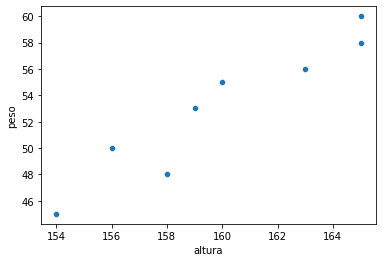

In [8]:
_ = sns.scatterplot(x='altura', y='peso', data=df)

Predizendo pesos...

In [9]:
alturas = [155, 161, 165]
alturas

[155, 161, 165]

In [10]:
np.array(alturas)

array([155, 161, 165])

In [11]:
alturas_array = np.array(alturas).reshape(-1, 1)
alturas_array

array([[155],
       [161],
       [165]])

In [12]:
import pickle

In [13]:
with open('dados_modelos/estimador_reg_lin.pickle', 'rb') as f:
    estimador = pickle.load(f)

In [44]:
pesos_estimados = estimador.predict(alturas_array)
pesos_estimados

array([47.13362069, 54.32327586, 59.11637931])

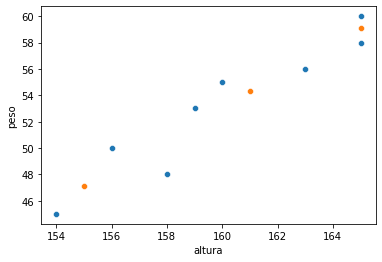

In [15]:
_ = sns.scatterplot(x='altura', y='peso', data=df)
_ = sns.scatterplot(x=alturas, y=pesos_estimados)

In [16]:
estimador.coef_

array([1.19827586])

In [17]:
estimador.intercept_

-138.59913793103445

In [18]:
# a * x + b
155 * 1.19827586 + (-138.59913793103445)

47.13362036896555

Qual foi o erro?
<img src=" 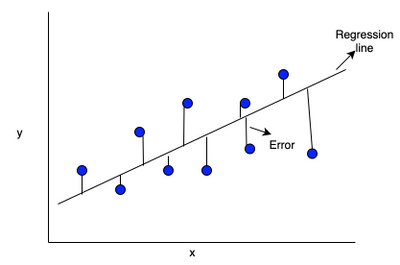" >

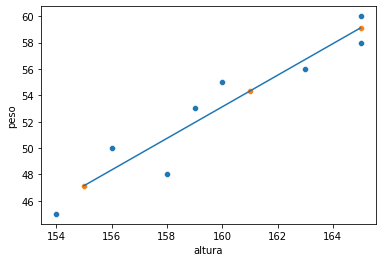

In [19]:
_ = sns.scatterplot(x='altura', y='peso', data=df)
_ = sns.scatterplot(x=alturas, y=pesos_estimados)
_ = sns.lineplot(x=alturas, y=pesos_estimados)

In [20]:
altura_real = 160
peso_real = 55

In [21]:
# Previsao
160 * 1.19827586 + (-138.59913793103445)

53.12499966896556

In [22]:
# Previsao
peso_predito = estimador.predict([[160]])
peso_predito

array([53.125])

In [23]:
erro_uma_previsao = peso_real - peso_predito
erro_uma_previsao

array([1.875])

Validação

In [24]:
# Exemplo filtro
df_temp = df.head().copy()
df_temp

,altura,peso
0,154,45
1,156,50
2,165,60
3,160,55
4,165,58


In [25]:
df_temp['altura'] == 154

0     True
1    False
2    False
3    False
4    False
Name: altura, dtype: bool

In [26]:
df_temp[df_temp['altura'] == 154]

,altura,peso
0,154,45


In [27]:
# Randomizando True e False
np.random.rand(len(df))

array([0.81760459, 0.81306155, 0.46621152, 0.43143507, 0.2084897 ,
       0.7376987 , 0.54547313, 0.01214728])

In [28]:
np.random.rand(len(df)) < 0.1 # 10% serao True

array([False,  True, False, False, False, False, False, False])

In [29]:
# Criando um modelo
# 1) Dividindo os dados em treino e teste

In [30]:
filtro = np.random.rand(len(df)) < 0.7
filtro

array([ True, False,  True, False, False,  True, False,  True])

In [31]:
df_treino = df[filtro]
df_treino

,altura,peso
0,154,45
2,165,60
5,163,56
7,159,53


In [32]:
df_teste = df[~filtro]
df_teste

,altura,peso
1,156,50
3,160,55
4,165,58
6,158,48


In [33]:
# 2) Treinando modelo, tenho que fornecer o X e o y
# X são as features
# y é o target

In [34]:
X_treino = df_treino.drop(['peso'], axis=1)
X_treino

,altura
0,154
2,165
5,163
7,159


In [35]:
y_treino = df_treino['peso']
y_treino

0    45
2    60
5    56
7    53
Name: peso, dtype: int64

In [36]:
X_teste = df_teste.drop(['peso'], axis=1)
X_teste

,altura
1,156
3,160
4,165
6,158


In [37]:
y_teste = df_teste['peso']
y_teste

1    50
3    55
4    58
6    48
Name: peso, dtype: int64

In [38]:
# Aqui a gente faria o treino, também chamado de fit
# E assim nasce o estimador (modelo)
with open('dados_modelos/estimador_reg_lin.pickle', 'rb') as f:
    estimador = pickle.load(f)

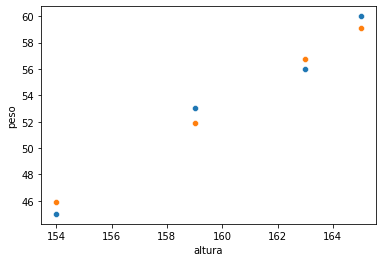

In [39]:
# Dentro do treino ele faz a "validação"
# Metrica de erro no treino
# TODO faltaria esparar os dados de Treino e Validação para o momento do treino

y_predito_treino = estimador.predict(X_treino)
y_predito_treino
_ = sns.scatterplot(x='altura', y='peso', data=df_treino)
_ = sns.scatterplot(x=X_treino['altura'], y=y_predito_treino)

In [40]:
# Media absoluta de erro = (erro primeiro ponto + erro segundo ponto) / 2
(abs(-2) + abs(5)) / 2

3.5

Tipos de Erros, parte 1

<img src=" 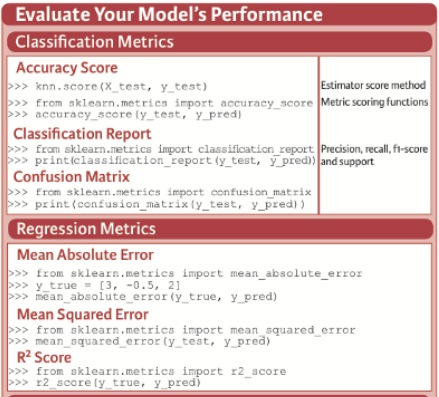" >

In [41]:
erro = 0
soma_erro_absoluto = 0
qtde_pontos = len(y_predito_treino)

for i in range(qtde_pontos):
    print(f'Valor esperado {y_treino.values[i]}')
    print(f'Valor predito {y_predito_treino[i]}')
    
    erro = y_treino.values[i] - y_predito_treino[i]
    erro_absoluto = abs(erro)
    soma_erro_absoluto += erro_absoluto
    
    print(f'Erro {erro}')
    print(f'Erro absoluto {erro_absoluto}')
    print()

media_erro_absoluto = soma_erro_absoluto / qtde_pontos

print(f'MAE {media_erro_absoluto}')

Valor esperado 45
Valor predito 45.93534482758622
Erro -0.9353448275862206
Erro absoluto 0.9353448275862206

Valor esperado 60
Valor predito 59.116379310344826
Erro 0.8836206896551744
Erro absoluto 0.8836206896551744

Valor esperado 56
Valor predito 56.71982758620689
Erro -0.7198275862068897
Erro absoluto 0.7198275862068897

Valor esperado 53
Valor predito 51.926724137931046
Erro 1.0732758620689538
Erro absoluto 1.0732758620689538

MAE 0.9030172413793096


In [42]:
from sklearn.metrics import mean_absolute_error

In [43]:
mean_absolute_error(y_treino.values, y_predito_treino)

0.9030172413793096

Teste